# Clean and PreProcess

In [1]:
import pandas as pd

In [2]:
github_url = 'https://raw.githubusercontent.com/marymorkos/birdclassification/main/bird.csv'
bird_df = pd.read_csv(github_url)

In [3]:
bird_df.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [4]:
##id: Sequential id
##huml: Length of Humerus (mm)
#humw: Diameter of Humerus (mm)
##ulnal: Length of Ulna (mm)
##ulnaw: Diameter of Ulna (mm)
##feml Length of Femur (mm)
##femw: Diameter of Femur (mm)
##tibl: Length of Tibiotarsus (mm)
##tibw: Diameter of Tibiotarsus (mm)
##tarl: Length of Tarsometatarsus (mm)

In [5]:
type_mapping = {
    'SW': 'Swimming Birds',
    'W': 'Wading Birds',
    'T': 'Terrestrial Birds',
    'R': 'Raptors',
    'P': 'Scansorial Birds',
    'SO': 'Singing Birds'
}

bird_df['type'] = bird_df['type'].map(type_mapping)

print(bird_df['type'].value_counts())

type
Singing Birds        128
Swimming Birds       116
Wading Birds          65
Raptors               50
Scansorial Birds      38
Terrestrial Birds     23
Name: count, dtype: int64


In [6]:
bird_df.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,Swimming Birds
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,Swimming Birds
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,Swimming Birds
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,Swimming Birds
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,Swimming Birds


In [7]:
# Check for missing values
print("Missing values:\n", bird_df.isnull().sum())

Missing values:
 id       0
huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64


In [8]:
import numpy as np

# Fill NaN values with the average of each numerical column
numerical_cols = bird_df.select_dtypes(include=np.number).columns
bird_df[numerical_cols] = bird_df[numerical_cols].fillna(bird_df[numerical_cols].mean())

# Confirm missing values have been filled
print("Missing values after filling with average:\n", bird_df.isnull().sum())

Missing values after filling with average:
 id       0
huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
type     0
dtype: int64


In [9]:
print("Duplicate rows:\n", bird_df.duplicated().sum())

Duplicate rows:
 0


In [10]:
bird_df.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,Swimming Birds
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,Swimming Birds
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,Swimming Birds
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,Swimming Birds
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,Swimming Birds


In [11]:
bird_df = bird_df.drop(columns=['id'])

# Visualize what we have

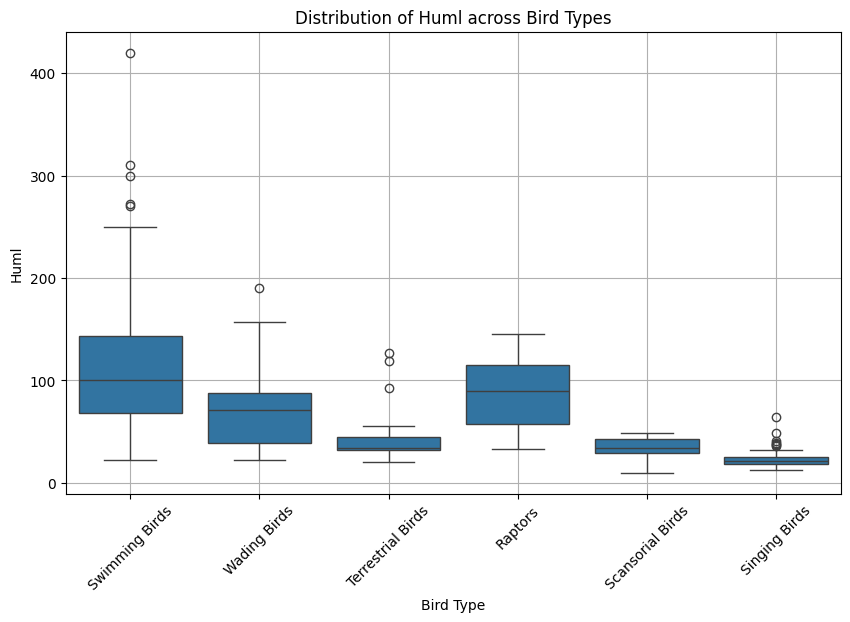

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize the distribution of 'type' variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='huml', data=bird_df)
plt.xlabel('Bird Type')
plt.ylabel('Huml')
plt.title('Distribution of Huml across Bird Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid for better readability
plt.show()

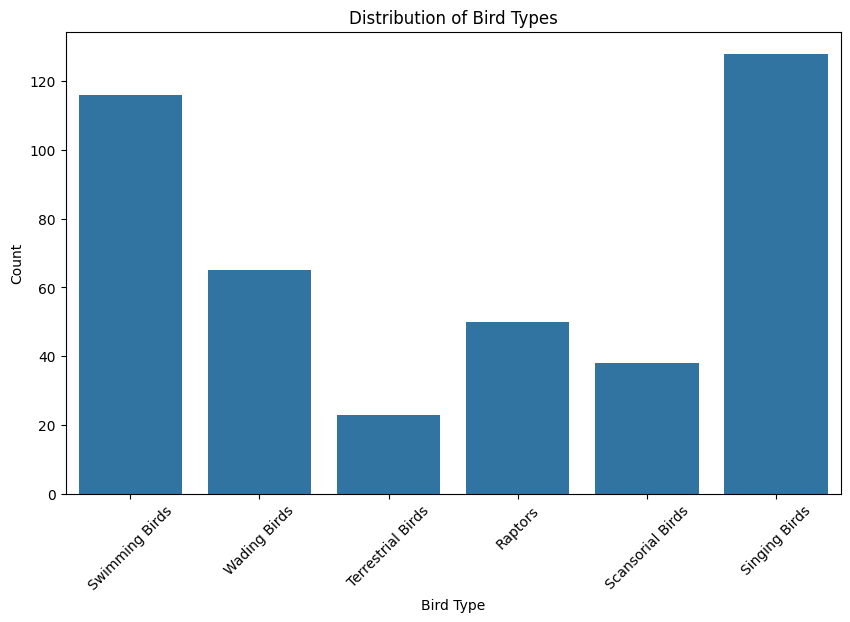

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=bird_df)
plt.xlabel('Bird Type')
plt.ylabel('Count')
plt.title('Distribution of Bird Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Prediction One: Random Forest Classifier

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
# Split data into predictors (X) and target (y)
X = bird_df.drop(columns=['type'])
y = bird_df['type']

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = model.predict(X_test)

In [19]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8214285714285714


In [20]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 6  0  0  0  0  0]
 [ 0  7  0  0  0  1]
 [ 0  0 26  0  0  0]
 [ 3  2  1 20  0  4]
 [ 0  0  0  0  4  0]
 [ 0  1  1  2  0  6]]


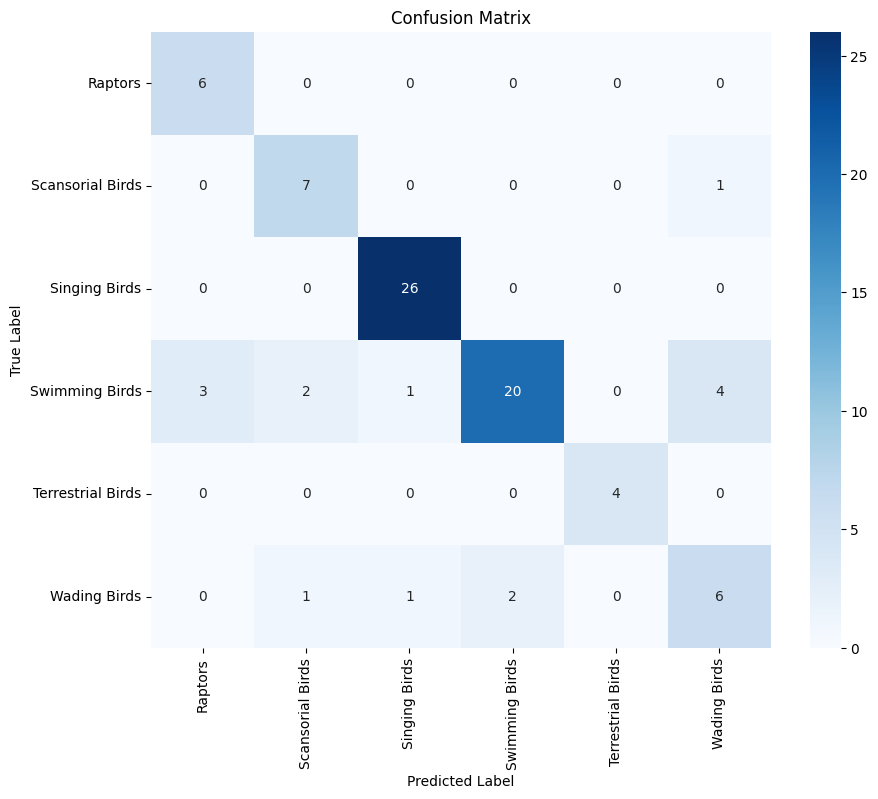

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [23]:
# Split data into predictors (X) and target (y)
X = bird_df.drop(columns=['type'])
y = bird_df['type']

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Make predictions
y_pred = model.predict(X_test)

In [27]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8214285714285714


In [28]:
feature_importances = model.feature_importances_

In [29]:
# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [30]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

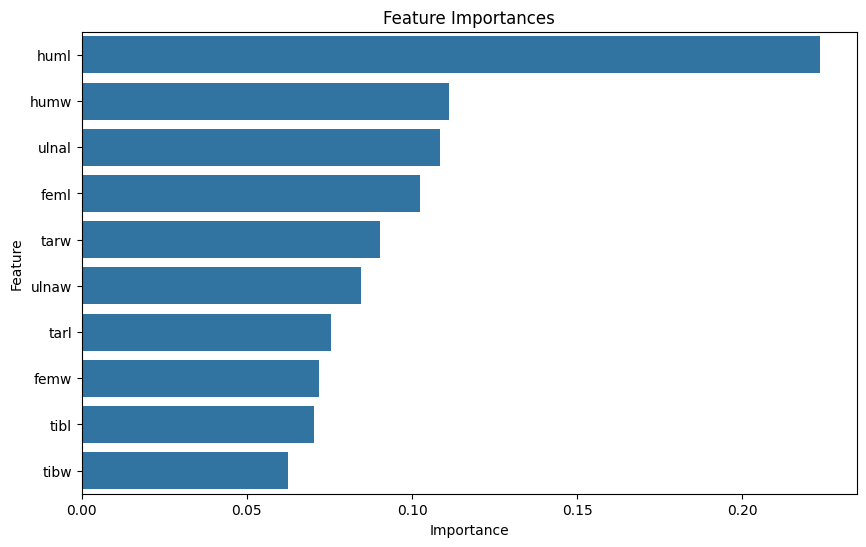

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# Logistic Regression

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
# Splitting data into training and testing sets
X = bird_df[['huml', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw']]
y = bird_df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7857142857142857


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
cm = confusion_matrix(y_test, y_pred)

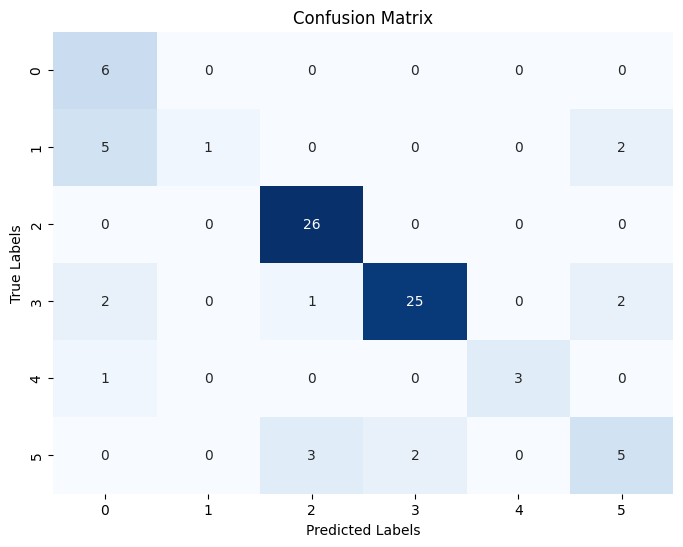

Classification Report:
                   precision    recall  f1-score   support

          Raptors       0.43      1.00      0.60         6
 Scansorial Birds       1.00      0.12      0.22         8
    Singing Birds       0.87      1.00      0.93        26
   Swimming Birds       0.93      0.83      0.88        30
Terrestrial Birds       1.00      0.75      0.86         4
     Wading Birds       0.56      0.50      0.53        10

         accuracy                           0.79        84
        macro avg       0.80      0.70      0.67        84
     weighted avg       0.84      0.79      0.77        84



In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)
##bird species is encoded
##Swimming Birds 0
##Wading Birds 1
##Terrestrial Birds 2
##Raptors 3
##Scansorial Birds 4
##Singing Birds 5

# Preditction Two: Linear Regression

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

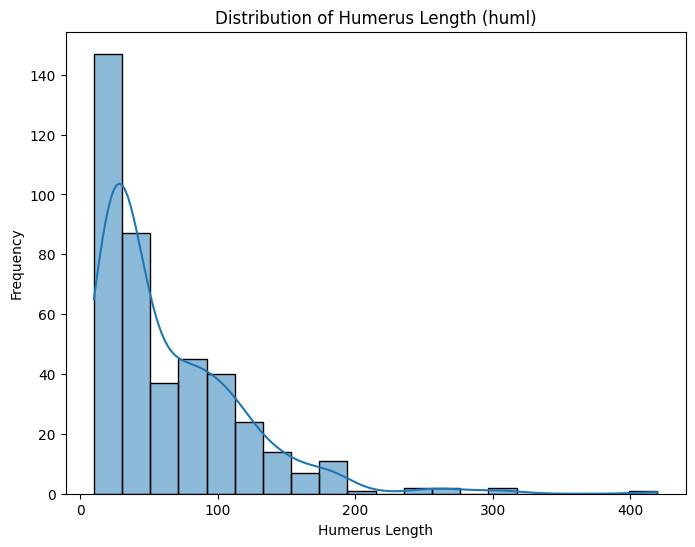

In [41]:
plt.figure(figsize=(8, 6))
sns.histplot(bird_df['huml'], bins=20, kde=True)
plt.title('Distribution of Humerus Length (huml)')
plt.xlabel('Humerus Length')
plt.ylabel('Frequency')
plt.show()

In [42]:
##create yo model
predictors = ['humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw']
target = 'huml'

In [43]:
##yess split it up
X_train, X_test, y_train, y_test = train_test_split(bird_df[predictors], bird_df[target], test_size=0.2, random_state=42)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r2)

Mean Squared Error (MSE): 40.22684677763533
R-squared (R^2) Score: 0.9881899672183179


In [47]:
coefficients = pd.Series(model.coef_, index=predictors)
print("\nCoefficients:")
print(coefficients)


Coefficients:
humw     4.740299
ulnal    0.673172
ulnaw   -0.425504
feml    -0.233495
femw    -8.769398
tibl     0.237769
tibw     8.610500
tarl    -0.056874
tarw    -0.333413
dtype: float64


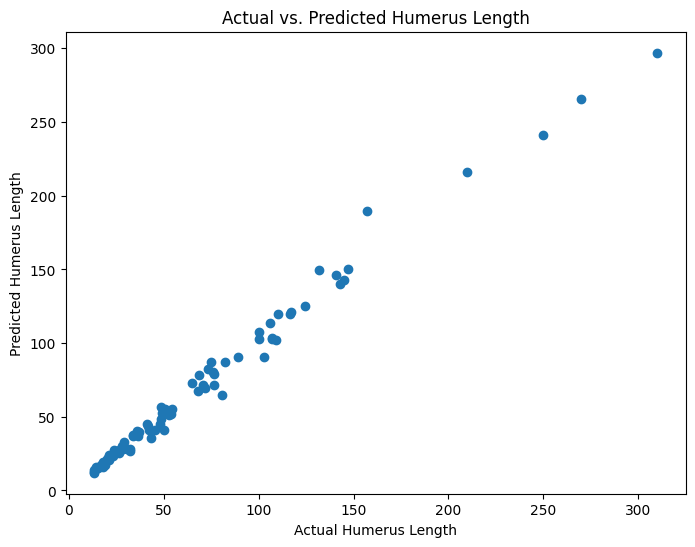

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Humerus Length")
plt.ylabel("Predicted Humerus Length")
plt.title("Actual vs. Predicted Humerus Length")
plt.show()

# Tuning and Validation

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [50]:
github_url = 'https://raw.githubusercontent.com/marymorkos/birdclassification/main/bird.csv'
bird_df = pd.read_csv(github_url)

In [51]:
numerical_cols = bird_df.select_dtypes(include=np.number).columns
bird_df[numerical_cols] = bird_df[numerical_cols].fillna(bird_df[numerical_cols].mean())

In [52]:
print("Missing values after filling with average:\n", bird_df.isnull().sum())

Missing values after filling with average:
 id       0
huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
type     0
dtype: int64


In [53]:
label_encoder = LabelEncoder()
bird_df['type'] = label_encoder.fit_transform(bird_df['type'])

In [54]:
# Separate features and target variable
X = bird_df.drop(columns=['id', 'type'])
y = bird_df['type']

In [55]:
model = RandomForestClassifier(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.79761905 0.83333333 0.78571429 0.80952381 0.8452381 ]


In [56]:
rfe = RFE(estimator=model, n_features_to_select=5, step=1)
rfe.fit(X, y)
selected_features = np.array(X.columns)[rfe.support_]
print("Selected features:", selected_features)

Selected features: ['huml' 'humw' 'ulnal' 'ulnaw' 'feml']


In [57]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv)
grid_search.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [50, 100, 150]})

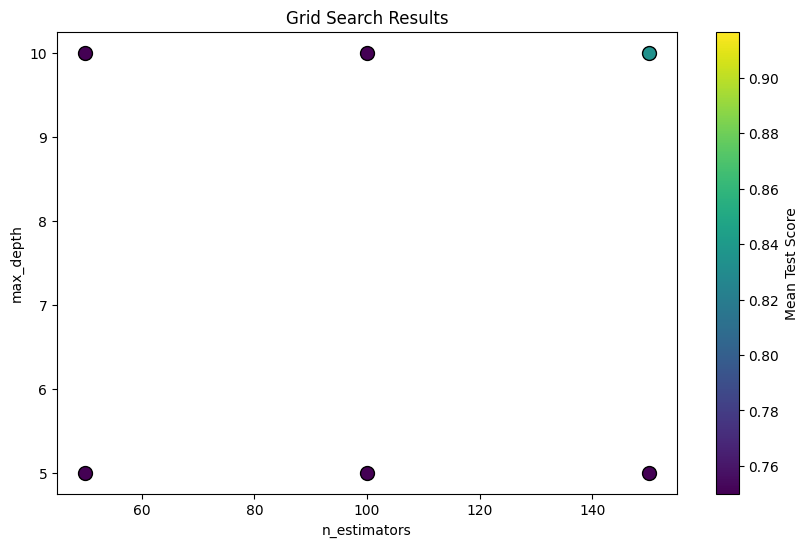

In [58]:
means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

plt.figure(figsize=(10, 6))
for mean, param in zip(means, params):
    plt.scatter(param['n_estimators'], param['max_depth'], c=mean, cmap='viridis', s=100, edgecolors='k')

plt.colorbar(label='Mean Test Score')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('Grid Search Results')
plt.show()

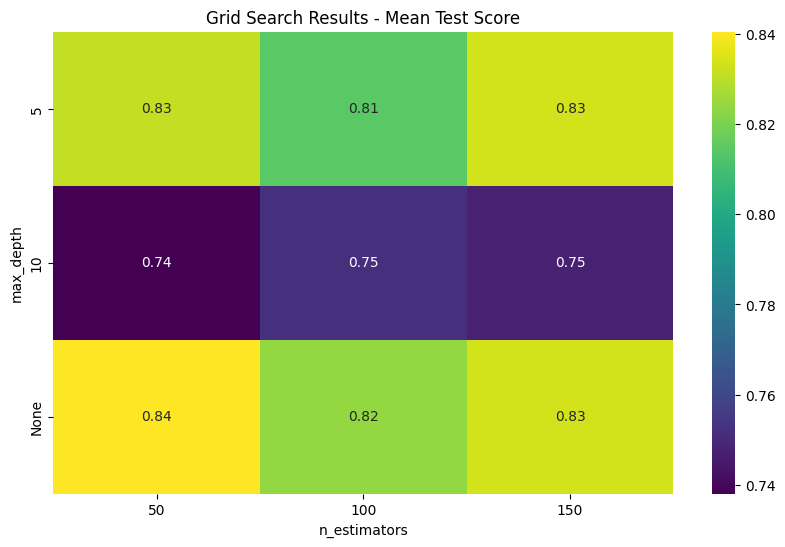

In [60]:
n_estimators_values = sorted(list(set(param['n_estimators'] for param in params)))
max_depth_values = sorted(list(set(param['max_depth'] for param in params if param['max_depth'] is not None))) + ['None']
mean_scores_matrix = np.array(means).reshape(len(max_depth_values), len(n_estimators_values))

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_scores_matrix, annot=True, cmap='viridis', xticklabels=n_estimators_values, yticklabels=max_depth_values)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('Grid Search Results - Mean Test Score')
plt.show()